**Code-2-ML CONTEST**

PART - 1


---



**Name:** K.Koushik

**Reg No:**19BCE7073


---



**Objective:**
To predict the Stock Price of a Listed Stock on 10th August 2020.

**Source Code:**

**Data Preprocessing:**

Importing the necessary libraries and packages along with the train and test dataset. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel("Train_dataset_Code2ML.xlsx")
df_test = pd.read_excel("Test_dataset_Code2ML.xlsx")

df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

Now checking the dataset for any null values.

In [3]:
df.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

We need to assign some value to this null values. So let's see the correlation between the features using heatmap.

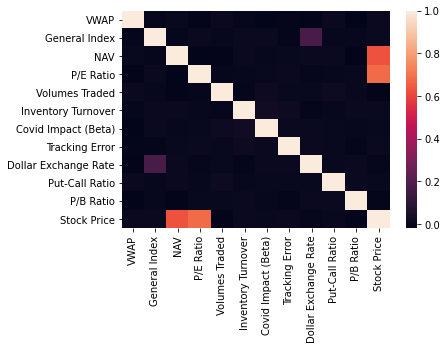

In [4]:
correlation_df=df.corr()
correlation_df
sns.heatmap(correlation_df)

We see that there is no much correlation between the features. So we will assign the values of those columns which are comparatively more correlated with the output variable “Stock Price” using the mean of the respective columns. 

Also, let's drop the other rows with null values and clean the test data.

In [5]:
df["Inventory Turnover"].fillna(df["Inventory Turnover"].mean(), inplace=True)
df["Covid Impact (Beta)"].fillna(df["Covid Impact (Beta)"].mean(), inplace=True)
df["P/E Ratio"].fillna(df["P/E Ratio"].mean(), inplace=True)
df["NAV"].fillna(df["NAV"].mean(), inplace=True)


#Cleaning of training data

df= df.dropna()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()


#Cleaning test data

df_test = df_test.dropna()
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()

df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
5,AA6,BSE,Materials,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,Healthcare,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
8,AA9,NSE,Materials,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811


In [6]:
df_test.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
6,AC3241,BSE,Materials,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60


Here in the dataset the “Industry” column alone contains strings. 

We need to convert the strings to numbers. So let's see what the categories are and then replace them by numbers from 0 to (N-1) where N is the number of categories.

In [7]:
print(pd.Categorical(df['Industry']))

df['Industry'] = df['Industry'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


#Doing the same for the test dataset

print(pd.Categorical(df_test['Industry']))

df_test['Industry'] = df_test['Industry'].astype('category')
cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

['Real Estate', 'Materials', 'Materials', 'Healthcare', 'Materials', ..., 'Materials', 'Healthcare', 'Materials', 'Materials', 'Materials']
Length: 6934
Categories (5, object): ['Energy', 'Healthcare', 'Information Tech', 'Materials', 'Real Estate']
['Materials', 'Energy', 'Information Tech', 'Healthcare', 'Materials', ..., 'Healthcare', 'Information Tech', 'Energy', 'Healthcare', 'Information Tech']
Length: 2415
Categories (5, object): ['Energy', 'Healthcare', 'Information Tech', 'Materials', 'Real Estate']


We can observe that the "Industry" column values have been changed below. 

In [8]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,4,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
3,AA4,BSE,3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
5,AA6,BSE,3,259.61,38182.08,10.63,153.05,19263869.0,8.04,0.03,0.0344,74.9,1.15,5.51,158.687016
6,AA7,NYSE,1,635.37,12765.84,67.21,29.63,7086103.0,5.87,0.78,0.0186,1.0,0.75,8.60,209.645870
8,AA9,NSE,3,950.81,11270.15,31.50,159.58,1361019.0,2.72,0.03,0.0534,74.9,1.22,6.46,514.240811


Finally the dataset is pre-processed for prediction.


---



**Building a Linear Kernel SVM Model and Linear Regression Model for Ensembling using Scikit-learn for Stock Price Prediction:**

Importing the necessary libraries. 

In [9]:
import sklearn
from sklearn import preprocessing

Now using the sklearn libraries for shuffling the dataset.

Because by shuffling the dataset, we can ensure that each data point creates an "independent" change on the model, without being biased by the same points before them.

In [10]:
df = sklearn.utils.shuffle(df)

We will remove the “Stock Index” and “index” columns because these numbers would not contribute much for prediction.

Now defining the “X” and “y” variables for training the model.

In [11]:
X = df.drop(columns = ['Stock Index', 'Index', 'Stock Price'], axis=1)
X = preprocessing.scale(X)
y = df['Stock Price'].values

Displaying the "X".

In [12]:
print(X.shape)
X

(6934, 12)


array([[-1.40977425,  0.04200008, -0.58538786, ..., -0.9706549 ,
         0.47084118, -1.59106464],
       [ 1.40409295, -0.26613842,  0.71230044, ...,  1.19979215,
         0.52021379, -0.37967661],
       [-0.00284065,  1.02267309,  0.71230044, ...,  1.19979215,
        -0.8128465 , -0.92822968],
       ...,
       [ 1.40409295, -0.37026699,  0.71230044, ...,  1.19979215,
        -0.12163006, -1.31297871],
       [ 1.40409295, -1.45143325, -0.58538786, ..., -0.9706549 ,
         1.50766586, -0.79109141],
       [-1.40977425,  1.65421125, -0.66175397, ...,  1.19979215,
         1.65578367,  0.17268586]])

Displaying the "y".

In [13]:
print(y.shape)
y

(6934,)


array([ 670.87023987,  364.12449891,  646.69328664, ..., 1122.71862044,
        835.65099269,  292.3991323 ])

Now splitting the dataset into training and testing.

consider the size of the test dataset to be 500. 

In [14]:
test_size = 500

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

**Linear Kernel SVM Model:**

Creating the linear kernel SVM model and fitting the training data.

In [15]:
from sklearn import svm

clf = svm.SVR(kernel="linear")
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Now finding the accuracy of our model. 

In [16]:
clf.score(X_test, y_test)

0.888542546632749

Lets see how the model have predicted the values for the test dataset.

In [19]:
# for X,y in zip(X_test, y_test):
#   print(f"Model: {clf.predict([X])[0]}, Actual: {y}")

y_pred1 = clf.predict(X_test)
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})

,Actual,Predicted
0,920.412304,937.501403
1,1142.894224,1026.933469
2,1462.506871,1224.407777
3,1321.643899,1155.879108
4,141.990974,345.145493
...,...,...
495,257.656254,212.618898
496,726.532564,762.240928
497,1122.718620,1067.868302
498,835.650993,906.727104




---


**Predicting for Test_dataset using Linear Kernel SVM Model:**

Finally, predicting the "Stock Price" for the test dataset using our trained model.

In [23]:
X_actual_test = df_test.drop(columns = ['Stock Index', 'Index'], axis=1)
X_actual_test = preprocessing.scale(X_actual_test)

y_model_pred1 = clf.predict(X_actual_test)
y_model_pred1

stock_index = df_test['Stock Index']
# for X,y in zip(stock_index, y_model_pred1):
#   print(f"Stock Index: {X}, Predict: {y}")

pd.DataFrame({'Stock Index': stock_index, 'Stock Price': y_model_pred1.flatten()})

,Stock Index,Stock Price
0,AC3235,869.255992
1,AC3236,416.925561
2,AC3237,1278.290539
3,AC3238,820.275295
6,AC3241,856.855315
...,...,...
3324,AD2732,-139.406215
3325,AD2733,1027.117317
3326,AD2734,227.415257
3329,AD2737,600.969081




---


**Linear Regression Model:**


Importing the necessary libraries.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Creating the Linear Regression model and fitting the training data.

In [27]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now finding the accuracy of our model.

In [28]:
y_pred2 = model_linear.predict(X_test)
print("R^2 :" , r2_score(y_test,y_pred2))

R^2 : 0.8909088998458539


Lets see how the model have predicted the values for the test dataset.

In [31]:
# for X,y in zip(X_test, y_test):
#   print(f"Model: {model_linear.predict([X])[0]}, Actual: {y}")

pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})

,Actual,Predicted
0,920.412304,951.938760
1,1142.894224,1044.598578
2,1462.506871,1254.851999
3,1321.643899,1179.669127
4,141.990974,337.148784
...,...,...
495,257.656254,200.885039
496,726.532564,768.299758
497,1122.718620,1090.112506
498,835.650993,916.630009




---


**Predicting for Test_dataset using Linear Regression Model:**

Finally, predicting the "Stock Price" for the test dataset using our trained model.

In [34]:
y_model_pred2 = model_linear.predict(X_actual_test)
y_model_pred2

stock_index = df_test['Stock Index']
# for X,y in zip(stock_index, y_model_pred2):
#   print(f"Stock Index: {X}, Predict: {y}")

pd.DataFrame({'Stock Index': stock_index, 'Stock Price': y_model_pred2.flatten()})

,Stock Index,Stock Price
0,AC3235,875.123534
1,AC3236,417.463622
2,AC3237,1310.442586
3,AC3238,826.894324
6,AC3241,864.709082
...,...,...
3324,AD2732,-165.520391
3325,AD2733,1040.002397
3326,AD2734,207.518337
3329,AD2737,603.303280




---


**Average ensemble technique:**

In order to achieve a better accuracy there are ensemble techniques like averaging, weighted averaging, boosting etc..

Let's consider average ensemble technique using Linear Kernel SVM Model and Linear Regression Model predictions. 
It is nothing but considering the average values of predictions of both the models for predicted each value.

In [35]:
final_pred=(y_model_pred1 + y_model_pred2)/2

# for X,y in zip(stock_index, final_pred):
#   print(f"Stock Index: {X}, Predict: {y}")

pd.DataFrame({'Stock Index': stock_index, 'Stock Price': final_pred.flatten()})

,Stock Index,Stock Price
0,AC3235,872.189763
1,AC3236,417.194591
2,AC3237,1294.366562
3,AC3238,823.584809
6,AC3241,860.782198
...,...,...
3324,AD2732,-152.463303
3325,AD2733,1033.559857
3326,AD2734,217.466797
3329,AD2737,602.136181
